# Метод Статистического управления процессами -
поиск управляемых неточностей в процессах с помощью анализа вариабельности.

Подарен руководителю аналитики OZON fintech в благодарность за ценные наставления,

т.к. тогда между нами не были установлены трудовые отношения.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [2]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Кандидат продуктовый\\2\\drive-download-20221216T194221Z-001'

In [3]:
data_orders = pd.read_csv('data_orders.csv')

In [4]:
data_orders.head(4)

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
0,2020-07-22 18:08:07,3000583041974,4,1,198.0
1,2020-07-22 20:57:32,3000583116437,4,0,128.0
2,2020-07-22 12:07:50,3000582891479,4,1,46.0
3,2020-07-22 13:50:20,3000582941169,4,1,62.0


In [5]:
data_orders['order_datetime_1'] = data_orders['order_datetime'].apply(lambda x: datetime.datetime.strptime(
    x, '%Y-%m-%d %H:%M:%S'
)
)
data_orders['order_date_hour'] = data_orders['order_datetime_1'].apply(lambda x: x.strftime("%Y-%m-%d %H") )
data_orders

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,order_datetime_1,order_date_hour
0,2020-07-22 18:08:07,3000583041974,4,1,198.0,2020-07-22 18:08:07,2020-07-22 18
1,2020-07-22 20:57:32,3000583116437,4,0,128.0,2020-07-22 20:57:32,2020-07-22 20
2,2020-07-22 12:07:50,3000582891479,4,1,46.0,2020-07-22 12:07:50,2020-07-22 12
3,2020-07-22 13:50:20,3000582941169,4,1,62.0,2020-07-22 13:50:20,2020-07-22 13
4,2020-07-22 21:24:45,3000583140877,9,0,NaN,2020-07-22 21:24:45,2020-07-22 21
...,...,...,...,...,...,...,...
10711,2020-07-22 13:11:35,3000599186906,4,0,36.0,2020-07-22 13:11:35,2020-07-22 13
10712,2020-07-22 13:13:55,3000599186962,4,0,4.0,2020-07-22 13:13:55,2020-07-22 13
10713,2020-07-22 13:17:21,3000599187034,4,1,34.0,2020-07-22 13:17:21,2020-07-22 13
10714,2020-07-22 13:16:28,3000599187024,4,0,6.0,2020-07-22 13:16:28,2020-07-22 13


In [6]:
data_groups = data_orders.groupby('order_date_hour').agg(
    {'cancellations_time_in_seconds': ['mean','min','max']
    })


data_groups[('cancellations_time_in_seconds', 'scope')] = data_groups[('cancellations_time_in_seconds', 'max')] - data_groups[('cancellations_time_in_seconds', 'min')]
data_groups[('cancellations_time_in_seconds', 'mean_mean')] = data_groups[('cancellations_time_in_seconds', 'mean')].mean()
data_groups[('cancellations_time_in_seconds', 'scope_mean')] = data_groups[('cancellations_time_in_seconds', 'scope')].mean()

data_groups

cancellations_time_in_seconds                       \
                                         mean  min     max   scope   
order_date_hour                                                      
2020-07-22 00                      163.822967  5.0  1785.0  1780.0   
2020-07-22 01                      141.009772  5.0  1873.0  1868.0   
2020-07-22 02                      155.187302  4.0  1206.0  1202.0   
2020-07-22 03                      146.201389  5.0  1536.0  1531.0   
2020-07-22 04                      159.032967  5.0   941.0   936.0   
2020-07-22 05                      242.175000  9.0  2680.0  2671.0   
2020-07-22 06                      185.807018  5.0  3697.0  3692.0   
2020-07-22 07                      149.806250  4.0  1017.0  1013.0   
2020-07-22 08                      150.211829  3.0  1710.0  1707.0   
2020-07-22 09                      169.516447  6.0  1186.0  1180.0   
2020-07-22 10                      149.507692  3.0  1650.0  1647.0   
2020-07-22 11                      198.626506  5.0  1536.0  1531.0   
2020-07-22 12                      164.468293  4.0  1774.0  1770.0   
2020-07-22 13                      168.716418  3.0  4303.0  4300.0   
2020-07-22 14                      163.975369  4.0  2190.0  2186.0   
2020-07-22 15                      156.273016  4.0  1346.0  1342.0   
2020-07-22 16                      172.843066  6.0  1614.0  1608.0   
2020-07-22 17                      169.428934  4.0  1476.0  1472.0   
2020-07-22 18                      176.099315  6.0  2376.0  2370.0   
2020-07-22 19                      156.927039  5.0  1166.0  1161.0   
2020-07-22 20                      142.101744  4.0  1464.0  1460.0   
2020-07-22 21                      132.598182  3.0  1028.0  1025.0   
2020-07-22 22                      144.766316  5.0  1142.0  1137.0   
2020-07-22 23                      169.316479  4.0  4097.0  4093.0   

                                        
                  mean_mean scope_mean  
order_date_hour                         
2020-07-22 00    163.684138    1861.75  
2020-07-22 01    163.684138    1861.75  
2020-07-22 02    163.684138    1861.75  
2020-07-22 03    163.684138    1861.75  
2020-07-22 04    163.684138    1861.75  
2020-07-22 05    163.684138    1861.75  
2020-07-22 06    163.684138    1861.75  
2020-07-22 07    163.684138    1861.75  
2020-07-22 08    163.684138    1861.75  
2020-07-22 09    163.684138    1861.75  
2020-07-22 10    163.684138    1861.75  
2020-07-22 11    163.684138    1861.75  
2020-07-22 12    163.684138    1861.75  
2020-07-22 13    163.684138    1861.75  
2020-07-22 14    163.684138    1861.75  
2020-07-22 15    163.684138    1861.75  
2020-07-22 16    163.684138    1861.75  
2020-07-22 17    163.684138    1861.75  
2020-07-22 18    163.684138    1861.75  
2020-07-22 19    163.684138    1861.75  
2020-07-22 20    163.684138    1861.75  
2020-07-22 21    163.684138    1861.75  
2020-07-22 22    163.684138    1861.75  
2020-07-22 23    163.684138    1861.75

In [7]:
data_groups.columns = ['mean','min','max','scope','mean_mean','scope_mean']

In [8]:
# Коэффициенты границ можно настроить ближе по статистике
A2 = 0.01
D3 = 0.2
D4 = 1.7

In [9]:
data_groups['A2R'] = A2 * data_groups['scope_mean']
data_groups['UCL_1'] = data_groups['mean_mean'] + data_groups['A2R'] 
data_groups['UCL_2'] = data_groups['mean_mean'] - data_groups['A2R']

data_groups['UCL_R_1'] = data_groups['scope_mean'] * D3
data_groups['UCL_R_2'] = data_groups['scope_mean'] * D4

data_groups['is_interesting'] = data_groups.apply(lambda x:  x['scope'] > x['UCL_R_2'] , axis=1  )
data_groups['is_interesting_1'] = data_groups.apply(lambda x:  x['mean'] > x['UCL_1'] , axis=1  )
data_groups['is_interesting_2'] = data_groups.apply(lambda x:  x['mean'] < x['UCL_2'] , axis=1  )

In [10]:
data_groups

,mean,min,max,scope,mean_mean,scope_mean,A2R,UCL_1,UCL_2,UCL_R_1,UCL_R_2,is_interesting,is_interesting_1,is_interesting_2
order_date_hour,,,,,,,,,,,,,,
2020-07-22 00,163.822967,5.0,1785.0,1780.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,False,False
2020-07-22 01,141.009772,5.0,1873.0,1868.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,False,True
2020-07-22 02,155.187302,4.0,1206.0,1202.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,False,False
2020-07-22 03,146.201389,5.0,1536.0,1531.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,False,False
2020-07-22 04,159.032967,5.0,941.0,936.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,False,False
2020-07-22 05,242.175000,9.0,2680.0,2671.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,True,False
2020-07-22 06,185.807018,5.0,3697.0,3692.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,True,True,False
2020-07-22 07,149.806250,4.0,1017.0,1013.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,False,False
2020-07-22 08,150.211829,3.0,1710.0,1707.0,163.684138,1861.75,18.6175,182.301638,145.066638,372.35,3164.975,False,False,False


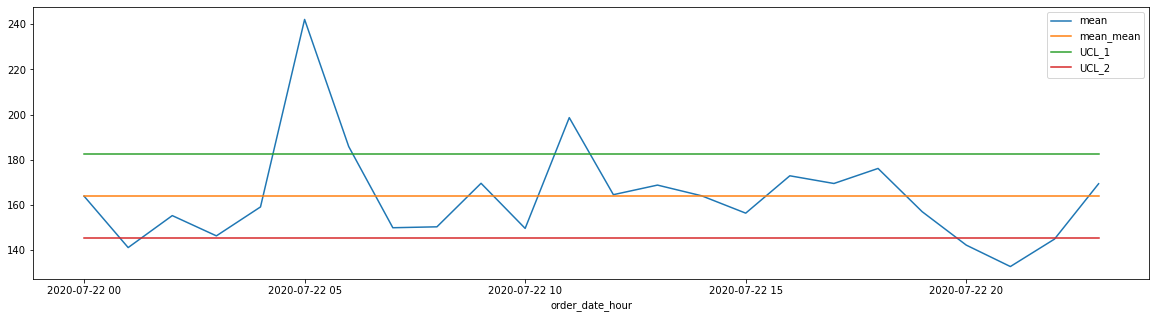

In [11]:
data_groups[['mean','mean_mean','UCL_1','UCL_2']].plot(figsize=(20,5));

In [12]:
#В 5, 6 и 11 часов повышенное среднее времени закрытия
data_groups.query('is_interesting_1 == True')[['mean','mean_mean','UCL_1','UCL_2']]

,mean,mean_mean,UCL_1,UCL_2
order_date_hour,,,,
2020-07-22 05,242.175000,163.684138,182.301638,145.066638
2020-07-22 06,185.807018,163.684138,182.301638,145.066638
2020-07-22 11,198.626506,163.684138,182.301638,145.066638


In [13]:
#В 1, 20, 21, 22 часов пониженное среднее времени закрытия
data_groups.query('is_interesting_2 == True')[['mean','mean_mean','UCL_1','UCL_2']]

,mean,mean_mean,UCL_1,UCL_2
order_date_hour,,,,
2020-07-22 01,141.009772,163.684138,182.301638,145.066638
2020-07-22 20,142.101744,163.684138,182.301638,145.066638
2020-07-22 21,132.598182,163.684138,182.301638,145.066638
2020-07-22 22,144.766316,163.684138,182.301638,145.066638


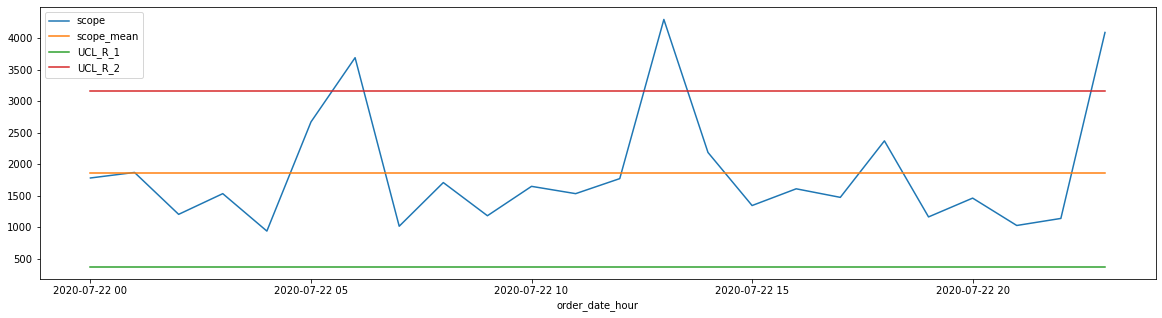

In [14]:
data_groups[['scope','scope_mean','UCL_R_1','UCL_R_2']].plot(figsize=(20,5));

In [15]:
#В 6, 13 и 23 часа повышенная вариация времени закрытия
data_groups[['scope','scope_mean','UCL_R_1','UCL_R_2','is_interesting']].query('is_interesting == True')

,scope,scope_mean,UCL_R_1,UCL_R_2,is_interesting
order_date_hour,,,,,
2020-07-22 06,3692.0,1861.75,372.35,3164.975,True
2020-07-22 13,4300.0,1861.75,372.35,3164.975,True
2020-07-22 23,4093.0,1861.75,372.35,3164.975,True


In [16]:
#В эти дни среднее времени закрытия выше общегосреднего
data_groups.query('is_interesting == True')[['mean','mean_mean','UCL_1','UCL_2']]

,mean,mean_mean,UCL_1,UCL_2
order_date_hour,,,,
2020-07-22 06,185.807018,163.684138,182.301638,145.066638
2020-07-22 13,168.716418,163.684138,182.301638,145.066638
2020-07-22 23,169.316479,163.684138,182.301638,145.066638


In [17]:
data_groups[['is_interesting','is_interesting_1','is_interesting_2']]

,is_interesting,is_interesting_1,is_interesting_2
order_date_hour,,,
2020-07-22 00,False,False,False
2020-07-22 01,False,False,True
2020-07-22 02,False,False,False
2020-07-22 03,False,False,False
2020-07-22 04,False,False,False
2020-07-22 05,False,True,False
2020-07-22 06,True,True,False
2020-07-22 07,False,False,False
2020-07-22 08,False,False,False


In [18]:
for is_int in ['is_interesting','is_interesting_1','is_interesting_2']:
    crit_hour_set = data_orders.set_index(
        'order_date_hour'
    ).join( 
        data_groups[[is_int]] 
    ).query(
    f'({is_int} == True)'
    )
    
    print(
        crit_hour_set.groupby('order_date_hour').agg(
        {'order_gk' : ['nunique'], 
         'cancellations_time_in_seconds' : ['min', 'mean', 'max']
        })
    )

                order_gk cancellations_time_in_seconds                    
                 nunique                           min        mean     max
order_date_hour                                                           
2020-07-22 06        159                           5.0  185.807018  3697.0
2020-07-22 13        366                           3.0  168.716418  4303.0
2020-07-22 23        836                           4.0  169.316479  4097.0
                order_gk cancellations_time_in_seconds                    
                 nunique                           min        mean     max
order_date_hour                                                           
2020-07-22 05         67                           9.0  242.175000  2680.0
2020-07-22 06        159                           5.0  185.807018  3697.0
2020-07-22 11        193                           5.0  198.626506  1536.0
                order_gk cancellations_time_in_seconds                    
                 nunique 

In [19]:
# Заказы с очень большим временем закрытия, про которые имеет смысл задать вопросы
data_orders.query('cancellations_time_in_seconds > 2000')

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,order_datetime_1,order_date_hour
3442,2020-07-22 23:43:11,3000622541402,4,0,4097.0,2020-07-22 23:43:11,2020-07-22 23
3956,2020-07-22 14:23:54,3000557285679,4,1,2190.0,2020-07-22 14:23:54,2020-07-22 14
5790,2020-07-22 18:11:02,3000627382683,4,1,2155.0,2020-07-22 18:11:02,2020-07-22 18
6825,2020-07-22 05:13:30,3000630305614,4,1,2680.0,2020-07-22 05:13:30,2020-07-22 05
8369,2020-07-22 13:21:20,3000589207012,4,1,4303.0,2020-07-22 13:21:20,2020-07-22 13
8473,2020-07-22 06:48:55,3000577775717,4,1,3697.0,2020-07-22 06:48:55,2020-07-22 06
9924,2020-07-22 18:30:46,3000618075800,4,1,2376.0,2020-07-22 18:30:46,2020-07-22 18


# В итоге метод SPC позволил выявить в процессе отдельные часы, привлекающие внимание повышенной вариабельностью.
# Дальнейшее исследование требует запроса дополнительной статистики по интересующим дням.